In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 12.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
from timeit import default_timer as timer
from datetime import timedelta
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [3]:
def compute_value_function(policy, gamma=1.0):

    # initialize value table with zeros
    value_table = np.zeros(env.observation_space.n)

    # set the threshold
    threshold = 1e-10

    while True:

        # copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table)

        # for each state in the environment, select the action according to the policy and compute the value table
        for state in range(env.observation_space.n):
            action = policy[state]

            # build the value table with the selected action
            value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state])
                        for trans_prob, next_state, reward_prob, _ in env.P[state][action]])

        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break

    return value_table

def policy_iteration(env,gamma = 1.0):

    # Initialize policy with zeros
    old_policy = np.zeros(env.observation_space.n)
    no_of_iterations = 200000
    iteration_end=0

    for i in range(no_of_iterations):

        # compute the value function
        new_value_function = compute_value_function(old_policy, gamma)

        # Extract new policy from the computed value function
        new_policy = extract_policy(new_value_function, gamma)

        # Then we check whether we have reached convergence i.e whether we found the optimal
        # policy by comparing old_policy and new policy if it same we will break the iteration
        # else we update old_policy with new_policy

        if (np.all(old_policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            iteration_end = i+1
            break
        old_policy = new_policy

    return new_policy,iteration_end

In [4]:
def extract_policy(value_table, gamma = 1.0):

    # initialize the policy with zeros
    policy = np.zeros(env.observation_space.n)


    for state in range(env.observation_space.n):

        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)

        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward_prob, _ = next_sr
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))

        # select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)

    return policy

In [5]:
def run_episode(env, policy, gamma, render=True):
    obs, info = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()

        # Convert obs to integer if needed
        obs = int(obs)

        # Check the documentation for env.step() to ensure proper unpacking
        step_result = env.step(policy[obs])

        # Assuming step_result is a tuple with four values
        obs, reward, terminated, truncated, info = step_result

        total_reward += (gamma ** step_idx * reward)
        step_idx += 1

        if terminated:
            break

    return total_reward

def evaluate_policy(env, policy, gamma , n = 100):
	scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
	return np.mean(scores)



In [6]:
def plot_policy_map(title, policy, map_desc, color_map, direction_map):
	fig = plt.figure()
	ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
	font_size = 'x-large'
	if policy.shape[1] > 16:
		font_size = 'small'
	plt.title(title)
	for i in range(policy.shape[0]):
		for j in range(policy.shape[1]):
			y = policy.shape[0] - i - 1
			x = j
			p = plt.Rectangle([x, y], 1, 1)
			p.set_facecolor(color_map[map_desc[i,j]])
			ax.add_patch(p)

			text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
						   horizontalalignment='center', verticalalignment='center', color='w')


	plt.axis('off')
	plt.xlim((0, policy.shape[1]))
	plt.ylim((0, policy.shape[0]))
	plt.tight_layout()
	plt.savefig(title+str('.png'))
	plt.close()

	return (plt)


In [7]:
def colors_lake():
	return {
		b'S': 'green',
		b'F': 'skyblue',
		b'H': 'black',
		b'G': 'gold',
	}

def directions_lake():
	return {
		3: '⬆',
		2: '➡',
		1: '⬇',
		0: '⬅'
	}

FROZEN LAKE 4 BY 4

In [8]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', render_mode="ansi")
env.reset()
print(env.render())




SFFF
FHFH
FFFH
HFFG



In [9]:
optimal_value_function,iteration_end = policy_iteration(env=env,gamma=1.0)
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)
print(optimal_policy)


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


Policy-Iteration converged at step 7.
[1. 2. 3. 3. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 1. 0.]


In [10]:
best_vals=[0]*10
desc = env.unwrapped.desc

time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10
list_scores=[0]*10

import matplotlib.pyplot as plt
import time

for i in range(0,10):
  st=time.time()
  optimal_value_function,iteration_end = policy_iteration(env=env,gamma = (i+0.5)/10)
  policy = extract_policy(optimal_value_function, gamma = (i+0.5)/10)
  policy_score = evaluate_policy(env,optimal_policy, (i+0.5)/10, n=1000)
  gamma = (i+0.5)/10
  plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + ' (Policy Iteration) ' + 'Gamma: '+ str(gamma),policy.reshape(4,4),desc,colors_lake(),directions_lake())
  end=time.time()
  gamma_arr[i]=(i+0.5)/10
  iters[i]=iteration_end
  best_vals[i] = optimal_value_function
  list_scores[i]=np.mean(policy_score)
  time_array[i]=end-st





Policy-Iteration converged at step 5.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 6.


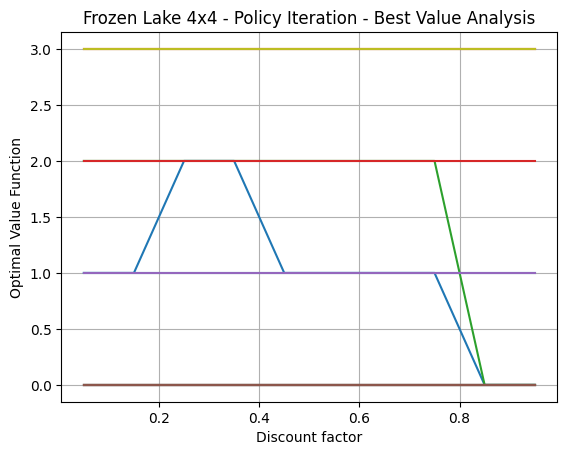

In [11]:

plt.plot(gamma_arr,best_vals)
plt.xlabel('Discount factor')
plt.ylabel('Optimal Value Function')
plt.title('Frozen Lake 4x4 - Policy Iteration - Best Value Analysis')
plt.grid()

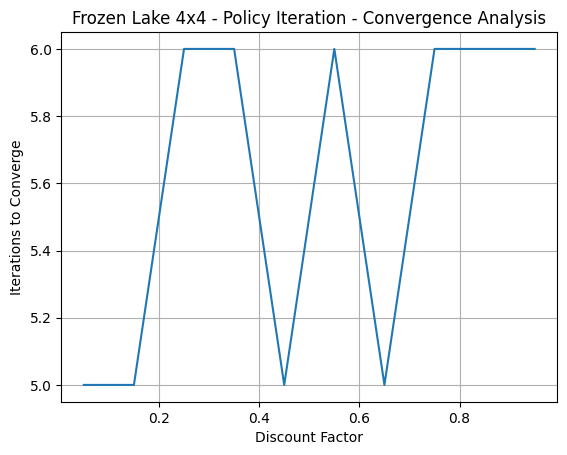

In [12]:
plt.plot(gamma_arr,iters)
plt.xlabel('Discount Factor')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake 4x4 - Policy Iteration - Convergence Analysis')
plt.grid()


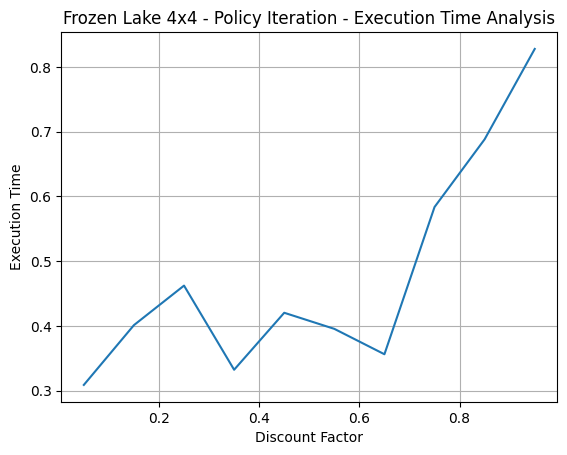

In [ ]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Discount Factor')
plt.title('Frozen Lake 4x4 - Policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time')
plt.grid()

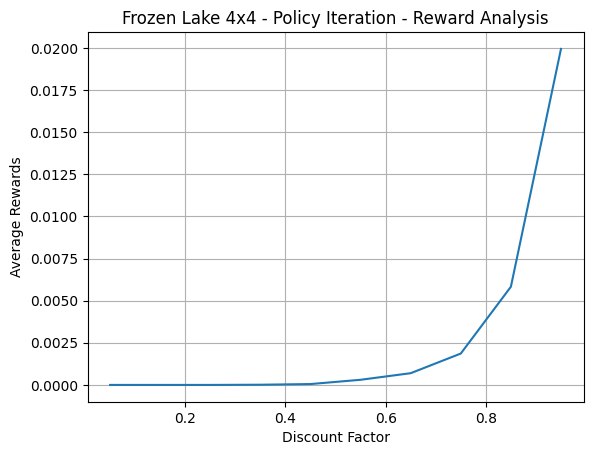

In [ ]:
plt.plot(gamma_arr,list_scores)
plt.xlabel('Discount Factor')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 4x4 - Policy Iteration - Reward Analysis')
plt.grid()


FROZEN LAKE 8 by 8

In [13]:
import gymnasium as gym
env = gym.make("FrozenLake8x8-v1",render_mode="ansi")
env.reset()
print(env.render())



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



In [14]:
optimal_value_function,iteration_end = policy_iteration(env=env,gamma=1.0)
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)
print(optimal_policy)


Policy-Iteration converged at step 13.
[0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 1. 1. 0. 0. 0. 0. 0. 0. 2. 3. 0. 0.
 0. 0. 1. 0. 0. 0. 2. 0. 1. 0. 0. 0. 1. 1. 3. 0. 0. 0. 0. 1. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 1. 1. 1. 0.]


In [15]:
best_vals=[0]*10
desc = env.unwrapped.desc

time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10
list_scores=[0]*10

import matplotlib.pyplot as plt
import time

for i in range(0,10):
  st=time.time()
  optimal_value_function,iteration_end = policy_iteration(env=env,gamma = (i+0.5)/10)
  policy = extract_policy(optimal_value_function, gamma = (i+0.5)/10)
  policy_score = evaluate_policy(env,optimal_policy, (i+0.5)/10, n=1000)
  gamma = (i+0.5)/10
  plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + ' (Value Iteration) ' + 'Gamma: '+ str(gamma),policy.reshape(8,8),desc,colors_lake(),directions_lake())
  end=time.time()
  gamma_arr[i]=(i+0.5)/10
  iters[i]=iteration_end
  best_vals[i] = optimal_value_function
  list_scores[i]=np.mean(policy_score)
  time_array[i]=end-st





Policy-Iteration converged at step 7.
Policy-Iteration converged at step 10.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 10.
Policy-Iteration converged at step 10.


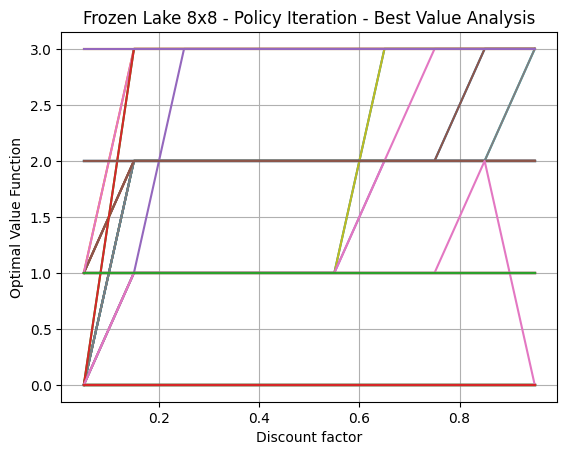

In [16]:
plt.plot(gamma_arr,best_vals)
plt.xlabel('Discount factor')
plt.ylabel('Optimal Value Function')
plt.title('Frozen Lake 8x8 - Policy Iteration - Best Value Analysis')
plt.grid()

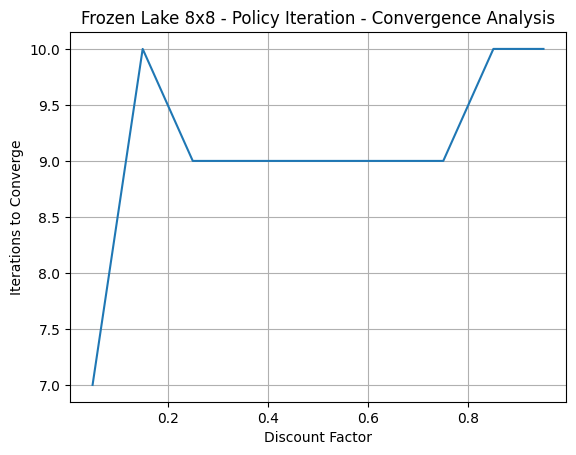

In [17]:
plt.plot(gamma_arr,iters)
plt.xlabel('Discount Factor')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake 8x8 - Policy Iteration - Convergence Analysis')
plt.grid()

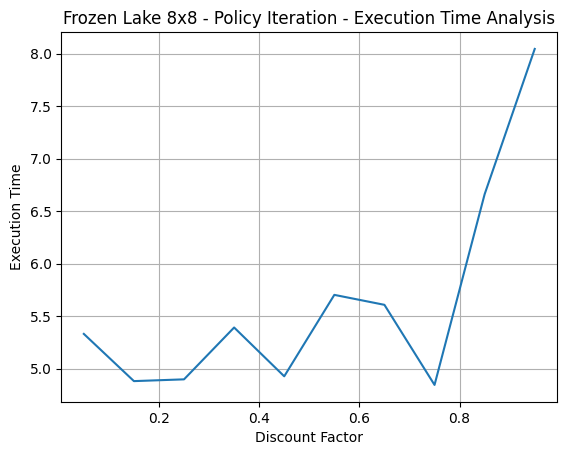

In [18]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Discount Factor')
plt.title('Frozen Lake 8x8 - Policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time')
plt.grid()

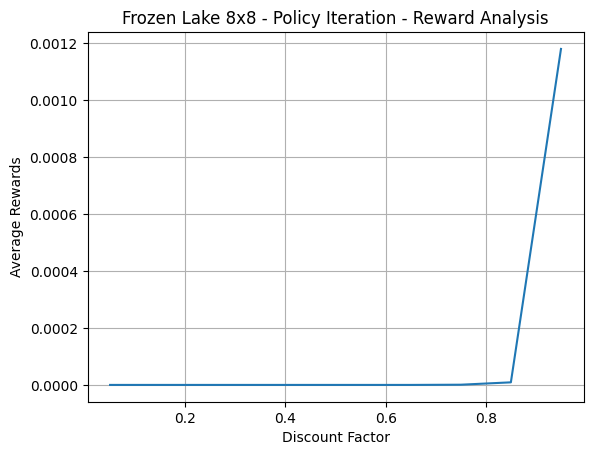

In [19]:
plt.plot(gamma_arr,list_scores)
plt.xlabel('Discount Factor')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake 8x8 - Policy Iteration - Reward Analysis')
plt.grid()